# Lecture 4 - Mitigating Overfitting, Experimental Design & Performance Measures for Regression Tasks

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [ ]:
def NoisySinusoidalData(N, a, b, sigma):
    '''Generates N data points in the range [a,b) sampled from a sin(2*pi*x) 
    with additive zero-mean Gaussian random noise with standard deviation sigma'''
    
    # N input samples, evenly spaced numbers between [a,b) incrementing by 1/N
    x = np.linspace(a,b,N)
    
    # draw N sampled from a univariate Gaussian distribution with mean 0, sigma standard deviation and N data points
    noise = np.random.normal(0,sigma,N)
    
    # desired values, noisy sinusoidal
    t = np.sin(2*np.pi*x) + noise
    
    return x, t

In [ ]:
# Generate input samples and desired values
N_train = 70 # number of data samples for training
N_test = 20 # number of data samples for test

a, b = [0,1] # data samples interval

sigma_train = 0.4 # standard deviation of the zero-mean Gaussian noise -- training data
sigma_test = 0.5 # standard deviation of the zero-mean Gaussian noise -- test data

x_train, t_train = NoisySinusoidalData(N_train, a, b, sigma_train) # Training Data - Noisy sinusoidal
x_true, t_true = NoisySinusoidalData(N_train, a, b, 0) # True Sinusoidal - in practice, we don't have the true fct
x_test, t_test = NoisySinusoidalData(N_test, a, b, sigma_test) # Test Data - Noisy sinusoidal

plt.figure(figsize=(10,5))
plt.scatter(x_train, t_train, c='b', linewidths=3, label = 'Training Data')
plt.plot(x_true, t_true, 'g', linewidth=4, label = 'True Mapper')
plt.plot(x_test, t_test, 'r^', label = 'Test Data')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, $x$',size=15)
plt.ylabel('Target Labels, $t$',size=15);

In [ ]:
def PolynomialRegression(x,t,M):
    '''Fit a polynomial of order M to the data input data x and desire values t'''
    
    # Compute feature matrix X with polynomial features
    X = np.array([x**i for i in range(M+1)]).T # this creates an N-by-(M+1) matrix
    
    # Compute the solution for the parameters w, using the MSE ojective function
    w = np.linalg.inv(X.T@X)@X.T@t 
    
    # Compute model prediction
    y = X@w
    
    return w, y

def PolynomialRegression_test(x_test, w):
    
    # Compute test feature matrix
    X_test = np.array([x_test**i for i in range(len(w))]).T # this is a N_test-by-(M+1) matrix
    
    # Prediction for test samples using the trained model
    y_test = X_test@w
    
    return y_test

In [ ]:
# Model Order
M = 15

# Find the parameters that fit the noisy sinusoidal
w, y_train = PolynomialRegression(x_train,t_train,M) 

# Predict output for test set
y_test = PolynomialRegression_test(x_test, w)

plt.figure(figsize=(10,7))
plt.plot(x_train, t_train, 'bo', label='Training Data')
plt.plot(x_train, y_train, '.-r', label = 'Estimated Polynomial in Training')
plt.plot(x_true, t_true, 'g', label = 'True Function')
plt.plot(x_test, t_test, 'r^', label = 'Test Data')
plt.plot(x_test, y_test, '--k', label = 'Prediction in Test')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

In [ ]:
# Displaying the weight vectors

plt.figure(figsize=(10,4))
plt.stem(w)
plt.ylabel('Weight values', size=15)
plt.xticks(np.arange(len(w)), ['$w_{'+str(i)+'}$' for i in range(len(w))],rotation=0);

* What happens when the test points fall outside the range of what the model has *learned*?

In [ ]:
M = 4
w, y_train = PolynomialRegression(x_train,t_train,M) 

x_test2, t_test2 = NoisySinusoidalData(N_test, 0, 1.5, sigma_test)

plt.figure(figsize=(10,5))
plt.plot(x_train, t_train, 'bo', label = 'Training Data')
plt.plot(x_true, t_true, '-g', label = 'True Sinusoidal')
plt.plot(x_test2, t_test2, 'r^', label = 'Test Data')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

In [ ]:
y_test2 = PolynomialRegression_test(x_test2, w)

plt.figure(figsize=(10,5))
plt.plot(x_train,t_train,'bo', label='Training Data')
plt.plot(x_train,y_train,'.-r', label = 'Estimated Polynomial')
plt.plot(x_true,t_true,'-g', label = 'True Function')
plt.plot(x_test2,t_test2,'r^', label = 'Test Data')
plt.plot(x_test2,y_test2,'--k', label = 'Test Predictions')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

---

# Overfitting and Underfitting

<div class="alert alert-info">
    <b>Overfitting</b> 

In model fitting, a model is said to have **overfit** to the training data, if it is *not* able to *generalize* to new and unknown data. We can observe this effect as the training error is small but the error in the test data is very large.

In other words, overfitting means that the *true* underlying model of the data is not estimated/learned properly, instead the model returned a poor representation that **memorized** the training samples **and** any meaningless noise in the data.
</div>

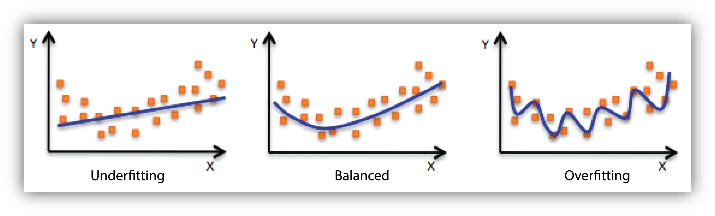

In [1]:
from IPython.display import Image
Image('figures/fits.png',width=700)

<div class="alert alert-info">
    <b>Underfitting</b> 

In model fitting, a model is said to have **underfit** if the error in both in training and test data sets are still decreasing. 

An underfitted model is not complex enough to model all the characteristics in the data.
</div>

As we saw before, as the polynomial model order increases, the weight values become very large! This is a good indication that we may be *memorizing* the training data.

* As $M$ increases, there are more parameters (more elements in the vector $\mathbf{w}$) to learn and, so, the model becomes more complex.

* The model order $M$ in polynomial regression regulates the model *complexity*. The large *M* is, the model complex the model is.
    * In a Polynomial regresssion it also controls the richness of the feature space.
* **Occam's Razor** states that the simplest model that works for our data is usually the most appropriate and sufficient. Model simplicity can mean different things, but we can consider model order. 

As a model that is too *complex*, it is more likely to *overfit*.
* This essentially means it "memorizes" the input training data and becomes incapable of predicting outside it,
* This includes memorizing all of the training data's noise!

---

# Strategies to Mitigate Overfitting

1. Add more data! - when possible

2. Occam's Razor - select a model with lower complexity

3. Regularization - constrains/regularizes the coefficients of the model

4. Cross-validation - technique for utilizing the training data to fine-tune hyperparameter values

---

# Regularization - Adding a Weight Penalty to the Objective Function

Suppose you have $N$ data points and you are trying to estimate $M$ parameters. In other words, you are solving a set of $N$ equations with $M$ variables. For the least squares objective function, we computed the solution for this linear system to be:

$$\mathbf{w} = \mathbf{X}^{\dagger}\mathbf{t} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{t}$$

**What happens when we have more unknowns than known variables, i.e., $M > N$? (This means the feature matrix $X$ will be a wide matrix.)** 

In other words, what happens when the data matrix, $\mathbf{X}^T\mathbf{X}$, is **not** full rank?

* Review *span* and *rank*: ["Inverse matrices, column space and null space", YouTube 3Blue1Brown video](https://www.youtube.com/watch?v=uQhTuRlWMxw&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=7)

In practice, it is quite often to obtain a **singular matrix** error. When this occurs, the matrix $\mathbf{X}^T\mathbf{X}$ is **not invertible**.

<div class="alert alert-info">
    <b>Regularization</b> 

Regularization constrains (or regularizes) the parameter coefficients such that they cannot take a large value. Regularization of the model parameters discourages learning a more complex, as to avoid the risk of overfitting.
</div>

### Ridge Regularizer

The Ridge regularizer, also known as the L2-Norm regularizer or weight decay, adds a term with the squared sum of the weights scaled by the hyperparameter $\lambda$. 

\begin{align*}
R^{(L2)}_{\mathbf{w}} &= \lambda \sum_{i=0}^M w_i^2 \\
&= \lambda \Vert\mathbf{w}\Vert_2^2
\end{align*}

This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the objective function during training. Once the model is trained, you want to evaluate the model's performance using the unregularized performance measure.

* The hyperparameter $\lambda$ controls how much you want to regularize the model. If $\lambda$ is 0 then the learning algorithm will just minimize the error term in the cost function. If $\lambda$ is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

### Lasso Regularizer

The Lasso regularizer, also known as the L1-norm regularizer, it adds a term with the L1-norm of the weight vector $\mathbf{w}$ scaled by the hyperparameter $\lambda$. $\lambda$ here has the same tradeoff responsibility.

\begin{align*}
R^{(L1)}_{\mathbf{w}} &= \lambda \sum_{i=0}^M |w_i| \\
&= \lambda \Vert\mathbf{w}\Vert_1
\end{align*}

* An important characteristic of the Lasso regularizer is that it tends to eliminate the weights of the least important features by setting them to zero. This is known as **sparsity**.

### Elastic Net Regularizer

Elastic Net is a middle ground between Ridge and Lasso. The regularization term is a simple mix of both Ridge and Lasso's regularization terms, and you can control the mix ratio with the hyperparameter $\beta$.

\begin{align*}
R^{(L12)}_{\mathbf{w}} &= \beta\lambda \sum_{i=0}^M |w_i| + (1-\beta) \lambda \sum_{i=0}^M w_i^2 \\
&= \beta R^{(L1)}_{\mathbf{w}} + (1-\beta) R^{(L2)}_{\mathbf{w}}
\end{align*}

In [ ]:
%matplotlib inline
def Regularizers(w,beta=0.5):
    L1 = np.abs(w)
    L2 = w**2
    Elastic = beta*np.abs(w) + (1-beta)*w**2
    return L1, L2, Elastic

x = np.linspace(-1.5,1.5,1000)
L1,L2,Elastic=Regularizers(x)

plt.plot(x,L1, 'b--', label = 'Lasso regularizer')
plt.plot(x,L2, 'm-.', label = 'Ridge regularizer')
plt.plot(x,Elastic, 'g-', label = 'Elastic Net regularizer')
plt.xlabel('Coefficients',size=15)
plt.ylabel('Regularizers',size=15); plt.legend(fontsize=15);

### Observations

* Ridge regularizer:
    * forces parameter values to be small but not equal to zero
    * is highly affected by outliers

* Lasso regularizer:
    * promotes sparsity, i.e. forces some parameter values to be exactly equal to zero
    * it is not as affected by outliers
    
* Elastic Net regularizer:
    * requires fine-tuning of an extra hyperparameter

### Examples

* Consider $\mathbf{w}=[0.5,0.5,1]$. We find that the rigde regularizer is $R^{(L2)}_{\mathbf{w}} = 0.5^2+0.5^2+1^2 = 1.5$, whereas the lasso regularizer gives us $R^{(L1)}_{\mathbf{w}}=0.5+0.5+1=2$. Thus, for this set of coefficients, the lasso regularizer will apply a stronger penalty (larger value).

* Consider $\mathbf{w}=[0,0,2]$. We find that the rigde regularizer is $R^{(L2)}_{\mathbf{w}} = 0^2+0^2+2^2 = 4$, whereas the lasso regularizer gives us $R^{(L1)}_{\mathbf{w}}=0+0+2=2$. Thus, for this set of coefficients, the ridge regularizer will apply a stronger penalty (larger value).

### Which one to choose?

Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features' weights down to zero. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

<div class="alert alert-info">
    <b>Ridge Regression</b> 

Let $\{(x_i,t_i)\}_{i=1}^N$ be the set of training data, where $x_i$ are the training samples and $t_i$ their associated target/desired value. Consider the linear regression model: $\mathbf{y} = \mathbf{X}\mathbf{w}$, where $\mathbf{X}$ is the feature matrix of size $N\times(M+1)$.

The Ridge Regression objective function penalizes the weights with the L2-norm:

\begin{align*}
J(\mathbf{w}) &= \Vert\mathbf{t}-\mathbf{X}\mathbf{w}\Vert_2^2 + \lambda \Vert\mathbf{w}\Vert_2^2
\end{align*}

where $\lambda$ is the **hyperparameter** that controls the trade off between minimizing the error and minimizing the regularizer.

Our goal is to find $\mathbf{w}$ that minimizes the objective function $J(\mathbf{w})$, that is:
    
\begin{align*}
\arg_{\mathbf{w}}\min J(\mathbf{w})
\end{align*}

</div>

Let's expand the equation for $J(\mathbf{w})$:

\begin{align*}
J(\mathbf{w}) &= \Vert\mathbf{t}-\mathbf{X}\mathbf{w}\Vert_2^2 + \lambda \Vert\mathbf{w}\Vert_2^2\\
&= (\mathbf{t}-\mathbf{X}\mathbf{w})^T(\mathbf{t}-\mathbf{X}\mathbf{w}) + \lambda\mathbf{w}^T\mathbf{w}\\
&= \mathbf{t}^T\mathbf{t} -\mathbf{t}^T\mathbf{X}\mathbf{w}-\mathbf{w}^T\mathbf{X}^T\mathbf{t}+\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w} + \lambda\mathbf{w}^T\mathbf{w}
\end{align*}
    
Taking the derivative:

\begin{align*}
\frac{d J}{d \mathbf{w}} = -2\mathbf{t}^T\mathbf{X} + 2\mathbf{w}^T\mathbf{X}^T\mathbf{X} + \lambda 2\mathbf{w}^T\mathbf{I}
\end{align*}

Setting it to zero, applyting transpose on both sides, and solving for $\mathbf{w}$:

\begin{align*}
-\mathbf{X}^T\mathbf{t} + \mathbf{X}^T\mathbf{X}\mathbf{w} + \lambda \mathbf{I}\mathbf{w} &= 0 \\
(\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I})\mathbf{w} &= \mathbf{X}^T\mathbf{t}\\
\mathbf{w} &= (\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^T\mathbf{t}
\end{align*}

The optimal solution is in closed-form analytical solution. This is because we are dealing with a linear model and a convex objective function:

$$\mathbf{w} = \left(\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I}\right)^{-1}\mathbf{X}^T\mathbf{t} $$

where $\mathbf{I}$ is an identity matrix of size $(M+1)\times (M+1)$. As you can see, we first **diagonally-load** the square matrix $\mathbf{X}^T\mathbf{X}$ before inverting it.

### Observations

* In practice, the square matrix $\mathbf{X}^T\mathbf{X}$ may be **singular**. This will happen when:
    1. There are more parameters ($M$) than samples ($N$).
    2. Some of the features are linearly dependent.
    
* A singular matrix:
    * is not full rank
    * has at least one eigenvalue equal to 0
    * its determinant is 0
    * one or more columns (or rows) are linearly dependent

* One solution to matrix singularity is to diagonally load it, before inverting. Diagonally loading a singular matrix, will force it to become full rank.

* If $\lambda \rightarrow 0$, then the penalty will be disregarded in the solution for the parameters. This applies the least *distortion* to $\mathbf{X}^T\mathbf{X}$.

* If $\lambda \rightarrow \infty$, then the penalty term will be very large, therefore the learning algorithm will *try* to minimize it. This applies the most *distortion* to $\mathbf{X}^T\mathbf{X}$.

**In code, how would you change the function ```PolynomialRegression``` created above to include the regularization term?**

In [ ]:
def PolynomialRegression_reg(x,t,M,lam):
    
    # Compute feature matrix X with polynomial features
    X = ##
    
    # Compute the solution for the parameters w
    w = ##
    
    # Compute model prediction
    y = ##
    
    return 

In [ ]:
M = ##
lam = ##

w, y = PolynomialRegression(x_train,t_train,M) 
w_reg, y_reg = PolynomialRegression_reg(x_train,t_train,M,lam) 

fig=plt.figure(figsize=(10,5))
plt.scatter(x_train,t_train, label='Training Data')
plt.plot(x_train,y,'r', label = 'Polynomial Regression')
plt.plot(x_train,y_reg, 'b',label = 'Polynomial Regression w/ Regularizer')
plt.plot(x_true,t_true,'--g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

# Performance Measures for Regression Tasks

In order to determine if the model is able to **generalize** to a **validation set**, we need to determine a **performance measure**.

Which measures would you use to compare model performances?

1. Error measures are always a good start for **regression** tasks. Some examples include:

    * Mean Squared Error (MSE) - best when the data does not have outliers. The MSE will penalize outliers heavily.

    * Mean Absolute Error (MAE) - best when you suspect data has outliers.
    
    * Normalized mean squared error (NMSE).
    
    * Normalized mean absolute error (NMAE).

2. Coefficient of Determination $r^2$
    * Advantage: it is bounded between $[0,1]$, where values closer to 1 indicate a better prediction.
    
3. Quantile-Quantile plot (or Q-Q plot)

    * Qualitative measurement of the model predictions vs the target values.
    * The Q-Q plot is used to answer the following questions:
        * Do two data sets come from populations with a common distribution?
        * Do two data sets have common location and scale?
        * Do two data sets have similar distributional shapes?
        * Do two data sets have similar tail behavior?

In [ ]:
## Predictions in training/test sets with and without regularization
y_train = ##
y_test = ##

y_train_reg = ##
y_test_reg = ##

## Error Measures
# Residual error for Training data for polynomial regression without and with regularizer
error_train = t_train - y_train
error_train_reg = t_train - y_train_reg 

# Residual error for Test data for polynomial regression without and with regularizer
error_test = t_test - y_test
error_test_reg = t_test - y_test_reg

# Error Measures
print('Mean Squared Error \n')
print('Training Set')
print('Without regularizer: ', np.mean(error_train**2))
print('With regularizer: ', np.mean(error_train_reg**2),'\n')
print('Test Set')
print('Without regularizer: ', np.mean(error_test**2))
print('With regularizer: ', np.mean(error_test_reg**2),'\n')
print('----------------------------------------------------------------')
print('Mean Absolute Error \n')
print('Training Set')
print('Without regularizer: ', np.mean(np.abs(error_train)))
print('With regularizer: ', np.mean(np.abs(error_train_reg)),'\n')
print('Test Set')
print('Without regularizer: ', np.mean(np.abs(error_test)))
print('With regularizer: ', np.mean(np.abs(error_test_reg)),'\n')

In [ ]:
## R2-SCORE

# it measures how much variance in one variance is explained by another variable 

from sklearn.metrics import r2_score

print('Test set without regularization:', ##)

print('Test set with regularization:', ##)

The coefficient of determination $r^2$ is bounded between $[0,1]$. The closer to 1, the closer the predictions are to the target value.

In [ ]:
## QUANTILES



# median

In [ ]:


# minimum

In [ ]:


# maximum

In [ ]:


# multiple at a time

In [ ]:
# Histogram for each RV

plt.hist(t_train, alpha=0.5, label='Target')
plt.hist(y, alpha=0.5, label='Pred. w/out reg.')
plt.hist(y_reg, alpha=0.5, label='Pred. w/ reg.')
plt.legend();

In [ ]:
# Disply quantiles of model vs target values

##
plt.xlabel('True Quantiles')
plt.ylabel('Predicted Quantiles')
plt.title('Q-Q Plot');

In [ ]:
# alternative way to plot the Q-Q plot



In [ ]:
base = np.linspace(min(t_train)-0.1,max(t_train)+0.1,100)
plt.plot(base,base,'r')
plt.scatter(np.sort(t_train), np.sort(y_train))
plt.xlabel('True Quantiles')
plt.ylabel('Predicted Quantiles')
plt.title('Q-Q Plot');

In [ ]:
print('R2 Score for Training without regularizer:', r2_score(np.sort(t_train), np.sort(y_train)))

print('R2 Score for Test without regularizer:', r2_score(np.sort(t_test), np.sort(y_test)))

In [ ]:
print('R2 Score for Training with regularizer:', r2_score(np.sort(t_train), np.sort(y_train_reg)))

print('R2 Score for Test with regularizer:', r2_score(np.sort(t_test), np.sort(y_test_reg)))

In practice, we consider a good fit if the $r^2$ of the Q-Q plot if **greater than 0.9**, ideally >0.99.

## Other Performance Measures

Performance of an algorithm can be determined using a variety of statistical goodness-of-fit measures. 

* For regression tasks this includes error-based measurements, hypothesis tests, Q-Q plots.
* For classification tasks this includes error rate, accuracy, ROC curves, performance-recall curves.

But it can also be in terms of:
1. Risk,
2. Training time,
3. Training storage/memory,
4. Testing time,
5. Testing storage/memory,
6. Interpretability, namely, whether the method allows knowledge extraction which can be checked and validated by experts, and
7. computational complexity.

---

# Cross-Validation

The goal of **cross-validation**, or CV, is to test the model's ability to predict new data that was not used in estimating the model, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset).

Cross-validation allows us to determine the values for the hyperparameter that provide the most **generalization**. Cross-validation mitigates the occurrrence of overfitting, but it does not eliminate it entirely.

Suggested reading: 

* [Sections 19.1-19.6](https://ufl.instructure.com/courses/455013/external_tools/412362?display=borderless) from the Alpaydin textbook 
* [Section 5.3 Hyperparameters and Model Validation](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html) from the "Python Data Science Handbook" textbook.

## Strategies of Experimentation - Fine-Tuning Hyperparameters

To fully test a system, you want to try to evaluate each of these parameters separately. However, this is often not easily done.

A few strategies for fine-tuning hyperparameters include:

* Best guess
* One factor at a time
* Factorial design or **grid search**
* Randomized search

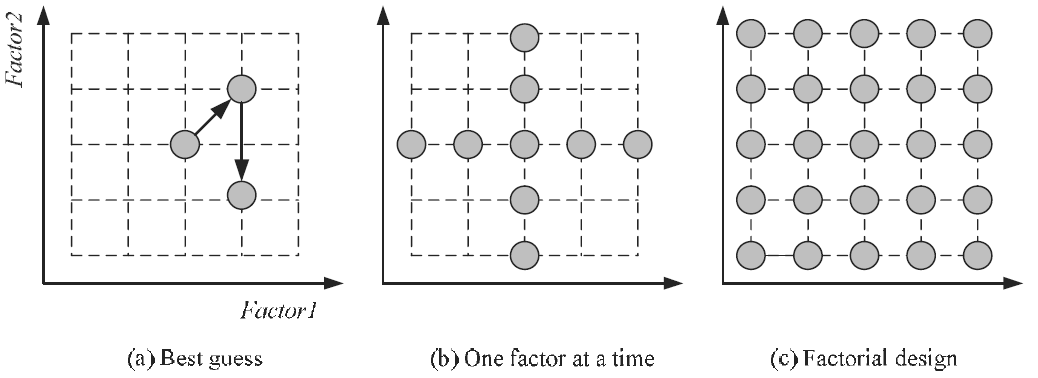

In [2]:
Image('figures/Experimentation.png',width=800)
# Source: Alpaydin, E. (2014) Introduction to Machine Learning. 3rd edition, MIT Press.

We first must select a **performance measure**, e.g. mean square error (MSE), coefficient of determination $r^2$. There are different strategies for implementing cross-validation:

1. $k\times 2$ cross-validation
2. k-fold cross-validation
3. Leave-One-Out cross-validation
4. Stratified cross-validation

We also need to make sure that classes are represented in the right proportions when subsets of data are held out, not to disturb the class prior probabilities; this is called **stratiﬁcation**. If a class has 20 percent examples in the whole dataset, in all samples drawn from the dataset, it should also have approximately 20 percent examples.

## $1\times 2$ cross-validation

Let's consider the case, where we only have a single validation set which resulted from splitting the training data into a training set and a validation set with splitting rations 70% and 30% respectively.

In [ ]:
from sklearn.model_selection import train_test_split

x_train2, x_validation, t_train2, t_validation = train_test_split(x_train, t_train, 
                                                                  test_size=0.3,
                                                                  shuffle=True,
                                                                 random_state=0)

x_train2.shape, x_validation.shape, t_train2.shape, t_validation.shape

Let's now vary the values for $M$ and estimate the associated coefficients $\mathbf{w}$ using the training set. Then, let's evaluate performance measure (e.g. MSE) in both training and validation sets:

In [ ]:
# Range of values for M
M_vals = range(1,12)

perf_train = []
perf_val = []
for M in M_vals:
    
    # Train the model (without regularization for simplicity of illustration)
    w, y_train = PolynomialRegression(x_train2, t_train2, M)
    
    # Make predictions for the training and validation sets
    y_validation = PolynomialRegression_test(x_validation, w)
    
    # Performance Measure
    perf_train += [np.mean(t_train2-y_train)**2]
    perf_val += [np.mean(t_validation-y_validation)**2]
    
# Plotting results
plt.figure(figsize=(10,3))
plt.plot(M_vals, perf_train, '-og',label='Training Set')
plt.plot(M_vals, perf_val, '-or',label='Validation Set')
plt.legend(fontsize=15)
plt.xlabel('Model order, $M$', size=12)
plt.ylabel('Performance Measure', size=12);

## K-Fold Cross-Validation

The technique of k-fold cross-validation, illustrated below for the case of $k=4$, involves taking the available data and partitioning it into $k$ groups (in the simplest case these are of equal size). Then $k-1$ of the groups are used to train a set of models that are then evaluated on the remaining group. This procedure is then repeated for all $k$ possible choices for the held-out group, indicated in the picture below by the red blocks, and the performance scores from the runs are then averaged.

$K$ is typically 10 or 30. As $K$ increases, the percentage of training instances increases and we get more robust estimators, but the validation set becomes smaller. Furthermore, there is the cost of training the classiﬁer $K$ times, which increases as $K$ is increased. As $N$ increases, $K$ can be smaller; if $N$ is small, $K$ should be large to allow large enough training sets.

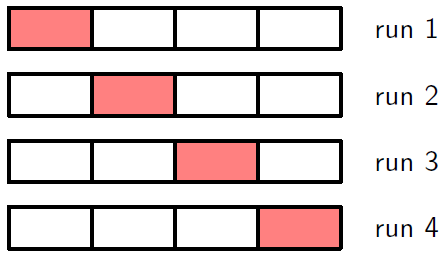

In [3]:
Image('figures/Kfold CV.png',width=400)

In [ ]:
from sklearn.model_selection import KFold

KFold?

**Goal:** find the best value for the **hyperparameters** $M$ (model order) and $\lambda$ (regularization trade-off parameter).

Let's use **4-fold cross-validation** on this data:

In [ ]:
k = 4 # number of folds

kf = KFold(n_splits=k,shuffle=True, random_state=0)
kf

In [ ]:
# Split training feature matrix into training and validation sets

f=1
for train_index, validation_index in kf.split(x_train):
    print('Fold ', f)
    print('The training set has ', train_index.shape[0],' samples')
    print('Their index locations are: ', train_index)
    print('The validation set has ', validation_index.shape[0],' samples')
    print('Their index locations are: ', validation_index,'\n')
    f+=1

In [ ]:
from sklearn.metrics import r2_score

# Set of values for lambda to explore
M_vals = np.array([2,3,4,5,6,7])
lam_vals= np.arange(0.1,1.1,0.1)

perf_train = np.zeros((len(M_vals), len(lam_vals)))
perf_val   = np.zeros((len(M_vals), len(lam_vals)))

for i in range(len(M_vals)):
    for j in range(len(lam_vals)):

        M   = M_vals[i]
        lam = lam_vals[j]
        print('M Value = ',M)
        print('Lambda Value = ',lam)

        # For each training/validation split
        f=1

        #initialize performance measures
        perf_train_avg, perf_val_avg = 0, 0

        for train_index, validation_index in kf.split(x_train):
            print('\nFold ',f)

            # Select training set using the indices found from kf.split
            x_train2, x_validation = x_train[train_index], x_train[validation_index]

            # Select validation set using the indices found from kf.split
            t_train2, t_validation = t_train[train_index], t_train[validation_index]

            # Training model with training set
            w, y_train = PolynomialRegression_reg(x_train2, t_train2, M, lam)

            # Evaluate trained model in validation set
            y_val = PolynomialRegression_test(x_validation, w)

            # Performance Measure
            perf_train[i,j] = r2_score(t_train2,y_train) #np.mean((t_train2-y_train)**2)
            perf_val[i,j]   = r2_score(t_validation, y_val) #np.mean((t_validation-y_val)**2)

            # Average performance measure
            perf_train_avg = perf_train_avg + perf_train[i,j]
            perf_val_avg = perf_val_avg + perf_val[i,j]
            print('Performance Training = ', perf_train[i,j])
            print('Performance Validation = ', perf_val[i,j])
            f+=1

        print('\nAverage Performance in Training = ', perf_train_avg/k)
        print('Average Performance in Validation = ', perf_val_avg/k)
        print('-----------------------------------------------------\n')

In [ ]:
# Note that we should be looking for the maximum r2-score (or minimum MSE).



In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(perf_val.T)
plt.yticks(range(len(lam_vals)), lam_vals)
plt.xticks(range(len(M_vals)), M_vals)
plt.colorbar()
plt.xlabel('Model order, $M$', size=15)
plt.ylabel('Lambda values, $\lambda$', size=15)
plt.title('Performance Measure in Validation');

## Refit the Model

Once the optimal hyperaparameters have been identified, the final model is trained using **all of the training data** (including the samples previously used for validation).

In [ ]:
best_M = ##
best_lam = ##

w, y_train = PolynomialRegression_reg(x_train, t_train, best_M, best_lam)

fig=plt.figure(figsize=(10,5))
plt.scatter(x_train,t_train, label='Training Data')
plt.plot(x_train,y_train,'r', label = 'Best Polynomial Regression Model')
plt.plot(x_true,t_true,'--g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

#### Discussion

* We select the set of hyperparameters $\{M,\lambda\}$ with the best performance score (e.g. smallest MSE or largest $r^2$).

* If the value of the hyperparameter falls at the edge of provided range of values, it is appropriate to expand the range of values for further exploration.

* Other performance measures can be used, for example, the coefficient of determination of the Q-Q plot for regression tasks, or accuracy score for classification tasks.

---

## Leave-One-Out Cross-Validation

One extreme case of cross-validation is the **leave-one-out** where given a dataset of $N$ instances, only one instance is left out as the validation set (instance) and training uses the $N − 1$ instances. We then get $N$ separate pairs by leaving out a different instance at each iteration. This is typically used in applications such as medical diagnosis, where labeled data is hard to ﬁnd. Leave-one-out **does not permit stratiﬁcation**.

---

<div class="alert alert-info">
    <b>No Free Lunch Theorem</b> 

The No Free Lunch Theorem states that there is no single learning algorithm that in any domain always induces the most accurate learner. The usual approach is to try many and choose the one that performs the best on a separate validation set.
    
For any learning algorithm, there is a dataset where it is very accurate and another dataset where it is very poor. When we say that a learning algorithm is good, we only quantify how well its inductive bias matches the properties of the data.
</div>

---